## 2.1 데이터와 행렬

선형대수(linear algebra)는 데이터 분석에 필요한 각종 계산을 돕는 학문이다. 데이터 분석을 하려면 수많은 숫자로 이루어진 데이터를 다루어야 한다. 하나의 데이터가 수십 개에서 수만 개의 숫자로 이루어져 있을 수도 있고, 또 이러한 데이터 수만 개가 하나의 집합을 이루고 있을 수도 있다.

선형대수를 사용하면 대량의 데이터를 포함하는 복잡한 계산 과정을 몇 글자 되지 않는 간단한 수식으로 서술할 수 있다. 따라서 데이터를 다루는 과정을 정확하고 간단하게 서술할 수 있다. 이를 위해 우선 선형대수에서 사용되는 여러 기호와 개념을 익혀보자.

이 책에서는 선형대수에 넘파이 패키지를, 시각화에 맷플롯립 패키지를 사용한다. 따라서 별도로 이야기하지 않아도 다음과 같이 이 두 가지 패키지가 임포트되어 있어야 한다. 

In [2]:
import numpy as np  # 넘파이 패키지 임포트
import matplotlib.pylab as plt  # 맷플롯립 패키지 임포트

주피터 노트북이나 IPython을 시작할 때마다 자동으로 패키지를 임포트하는 방법은 0.6절 ‘아이파이썬 및 주피터 설정’에서 이 책 앞부분의 스타트업 파일 설정을 참조한다.

### 데이터의 유형

선형대수에서 다루는 데이터는 개수나 형태에 따라 크게 **스칼라(scalar)**, **벡터(vector)**, **행렬(matrix)**, **텐서(tensor)** 유형으로 나뉜다. 스칼라는 숫자 하나로 이루어진 데이터이고, 벡터는 여러 숫자로 이루어진 데이터 레코드(data record)이며, 행렬은 이러한 벡터, 즉 데이터 레코드가 여럿인 데이터 집합이라고 볼 수 있다. 텐서는 같은 크기의 행렬이 여러 개 있는 것이라고 생각하면 된다.

데이터 분석의 연습에서 많이 사용되는 벤치마크 데이터셋(benchmark dataset) 중 하나인 붓꽃 데이터셋(iris dataset)을 살펴보며 데이터 유형을 알아보자. 이 데이터는 통계학자 피셔(Fisher)의 연구 결과에서 나온 것이다. 붓꽃 150송이에 대해 꽃받침의 길이, 꽃받침의 폭, 꽃잎의 길이, 꽃잎의 폭을 각각 측정한 것으로 150송이 중 50송이는 세토사(setosa)라는 종이고, 50송이는 베르시칼라(versicolor), 나머지 50송이는 버지니카(virginica)라는 종이다. 이 데이터셋은 붓꽃 크기를 이용하여 붓꽃의 종을 측정하는 예측(prediction) 문제로 활용된다. 이 데이터는 사이킷런 패키지에 포함되어 있다. 다음 코드는 붓꽃 데이터셋에서 첫 번째 꽃의 크기를 보여준다.

In [3]:
from sklearn.datasets import load_iris  # 사이킷런 패키지 임포트

iris = load_iris()  # 데이터 로드
iris.data[0, :]  # 첫 번째 꽃의 데이터

array([5.1, 3.5, 1.4, 0.2])

#### 스칼라

스칼라는 하나의 숫자만으로 이루어진 데이터를 말한다. 예를 들어 어떤 붓꽃 한 송이의 꽃잎 길이를 측정하면 숫자가 하나 나올 것이다. 이 데이터는 스칼라이다. 스칼라는 보통 $x$와 같이 알파벳 소문자로 표기하며 실수(real number)인 숫자 중의 하나이므로 실수 집합 $\mathbf{R}$의 원소라는 의미에서 다음처럼 표기한다.

$$
\begin{align}
x \in \mathbf{R} 
\tag{2.1.1}
\end{align}
$$

#### 벡터

벡터는 여러 개의 숫자가 특정한 순서대로 모여 있는 것을 말한다. 사실 대부분의 데이터 레코드는 여러 개의 숫자로 이루어진 경우가 많다. 예를 들어 붓꽃의 종을 알아내기 위해 붓꽃의 크기를 측정할 때, 꽃받침의 길이 $x_1$뿐 아니라 꽃받침의 폭 $x_2$, 꽃잎의 길이 $x_3$, 꽃잎의 폭 $x_4$라는 4개의 숫자를 측정할 수도 있다. 이렇게 측정된 4개의 숫자는 한 송이의 붓꽃에서 나온 데이터이므로 따로따로 다루기보다는 하나의 묶음(tuple)으로 묶어놓는 것이 좋다. 이때 숫자의 순서가 바뀌면 어떤 숫자가 꽃잎의 길이이고 어떤 숫자가 꽃받침의 폭인지 알 수 없으므로 숫자의 순서를 유지하는 것이 중요하다. 이런 데이터 묶음을 선형대수에서는 벡터라고 부른다. 

붓꽃의 크기 벡터는 4개의 데이터 $(x_1, x_2, x_3, x_4)$가 하나로 묶여 있는데 이를 선형대수 기호로는 다음처럼 하나의 문자 $x$로 표기한다.

$$ 
\begin{align}
x = \begin{bmatrix}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \\
\end{bmatrix}
\tag{2.1.2}
\end{align}
$$

이때 벡터는 복수의 가로줄, 즉 **행(row)**을 가지고 하나의 세로줄, 즉 **열(column)**을 가지는 형태로 위에서 아래로 내려써서 표기해야 한다.

하나의 벡터를 이루는 데이터의 개수가 $n$개이면 이 벡터를 **n-차원 벡터**(n-dimensional vector)라고 하며 다음처럼 표기한다.

$$ 
\begin{align}
x = \begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix}
\tag{2.1.3}
\end{align}
$$

또는
$$
\begin{align}
x \in \mathbf{R}^N
\tag{2.1.4}
\end{align}
$$

위에서 예로 든 붓꽃의 크기 벡터 $x$는 실수 4개로 이루어져 있으므로 4차원 벡터라고 하고 다음처럼 표기한다.

$$ 
\begin{align}
x \in \mathbf{R}^4 
\tag{2.1.5}
\end{align}
$$

벡터의 원소가 되는 스칼라값은 아래 첨자(subscript)를 붙여서 원소의 위치를 표시하는 것이 보통이다.
하지만 아래 첨자가 있다고 무조건 스칼라는 아니다. 벡터가 여러 개 있으면 서로 다른 벡터를 구별하기 위해 벡터 이름에 아래 첨자를 붙일 수도 있다. 따라서 아래 첨자를 가진 알파벳 소문자 기호는 스칼라일 수도 있고 벡터일 수도 있다. 두 경우는 문맥에 따라 구별해야 한다. 책에 따라서는 벡터와 스칼라와 구별하기 위해 볼드체 벡터 기호 $\mathbf{x}$나 화살표 벡터 기호 $\vec{x}$를 사용하기도 한다. 

$$ 
\begin{align}
\mathbf{x} = \vec{x} =
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix}
\tag{2.1.6}
\end{align}
$$

하지만 데이터 사이언스 분야의 책이나 논문에서는 모든 값이 벡터나 행렬이므로 굳이 볼드체 기호를 사용하지 않기 때문에 독자 스스로 문맥을 보고 스칼라인지 벡터인지 결정할 수밖에 없다. 이 책에서도 상황에 따라 여러가지 표기법을 같이 사용한다.

#### 특징 벡터

**데이터 벡터가 예측 문제에서 입력 데이터로 사용되면 특징 벡터(feature vector)**라고 한다.

예를 들어 어떤 붓꽃 표본 한 송이를 꺾어 측정하였더니 꽃받침 길이가 5.1cm, 꽃받침 폭이 3.5cm, 꽃잎 길이가 1.4cm, 꽃잎 폭이 0.2cm였다면 이 데이터 레코드를 $x_1$이라고 이름 붙이고 다음처럼 표시한다. 

$$  
\begin{align}
x_1 = 
\begin{bmatrix}
5.1 \\
3.5 \\
1.4 \\
0.2 \\  
\end{bmatrix}
\tag{2.1.7}
\end{align}
$$

또 다른 붓꽃은 다음과 같은 벡터로 나타낼 수 있다고 하자.

$$  
\begin{align}
x_2 = 
\begin{bmatrix}
4.9 \\
3.0 \\
1.4 \\
0.2 \\
\end{bmatrix}
\tag{2.1.8}
\end{align}
$$

만약 이러한 붓꽃 크기 벡터를 이용하여 붓꽃 종을 결정하는 예측 문제를 풀고 있다면 붓꽃 크기 벡터는 특징 벡터이다. 

#### 넘파이를 사용한 벡터 표현

넘파이는 선형대수 문제를 풀 때 사용하는 파이썬 패키지다.
넘파이를 사용하여 벡터를 표현할 때는 벡터를 다음처럼 열의 개수가 하나인 2차원 배열(array) 객체로 표현한다. 이때 배열의 차원은 벡터의 차원과 다른 의미다. 위에서 설명한 벡터의 차원은 원소 개수를 뜻한다. 배열은 원소 개수가 몇 개이든 한 줄로 나타낼 수 있다면 1차원 배열(1-dimensional array)이라고 한다. 원소를 가로와 세로가 있는 여러 줄의 직사각형 형태로 나타낼 수 있으면 2차원 배열(2-dimensional array)이라고 한다.

예를 들어 위에서 예로 든 벡터 $x_1$을 넘파이의 2차원 배열로 표기하면 다음과 같다.

In [3]:
x1 = np.array([[5.1], [3.5], [1.4], [0.2]])
x1

array([[5.1],
       [3.5],
       [1.4],
       [0.2]])

하지만 넘파이는 1차원 배열 객체도 대부분 벡터로 인정한다. 이때는 벡터가 마치 하나의 행처럼 표시되어도 실제로는 열이라는 점에 주의한다.

In [4]:
x1 = np.array([5.1, 3.5, 1.4, 0.2])
x1

array([5.1, 3.5, 1.4, 0.2])

그러나 벡터 데이터를 처리하는 프로그램에 따라서 두 가지 표현법 중 열 표기를 정확하게 요구하는 경우도 있으므로 주의해야 한다. 예를 들어 사이킷런 패키지에서 벡터를 요구하는 경우에는 반드시 열의 개수가 1개인 2차원 배열 객체를 넣어야 한다.

#### 연습 문제 2.1.1

NumPy를 사용해서  붓꽃 데이터 $x_2$에 대한 벡터 변수 ``x2``를 만든다.

In [4]:
x2 = np.array([3.2, 4.2, 3.1,1.1])

예측 문제의 입력 데이터는 대부분 벡터로 표시한다. 예를 들어 숫자 이미지를 입력받아 어떤 숫자인지 분류하는 문제를 생각해보자. 이미지는 원래 2차원 데이터이지만 예측 문제에서는 보통 1차원 벡터로 변환하여 사용한다. 다음은 사이킷런 패키지에서 제공하는 MNIST 숫자 이미지(digit image) 데이터셋이다. 이 데이터는 0부터 9까지의 숫자를 손으로 쓴 후에 8x8 해상도의 이미지로 스캔한 것이다. 다음 코드는 그중 숫자 0과 1의 이미지 8개를 출력한다.

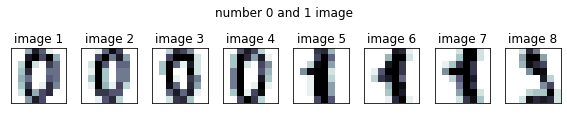

In [16]:
from sklearn.datasets import load_digits  # 패키지 임포트

digits = load_digits()  # 데이터 로드
samples = [0, 10, 20, 30, 1, 11, 21, 31]  # 선택된 이미지 번호
d = []
for i in range(8):
    d.append(digits.images[samples[i]])
plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); 
    plt.xticks([]);
    plt.yticks([]);
    plt.title("image {}".format(i + 1))
plt.suptitle("number 0 and 1 image")
plt.tight_layout()
plt.show()

이 2차원 이미지를 64-크기의 1차원 벡터로 펼치면 다음과 같다. 같은 숫자에 대한 벡터가 서로 닮았다는 점에 주의하라.

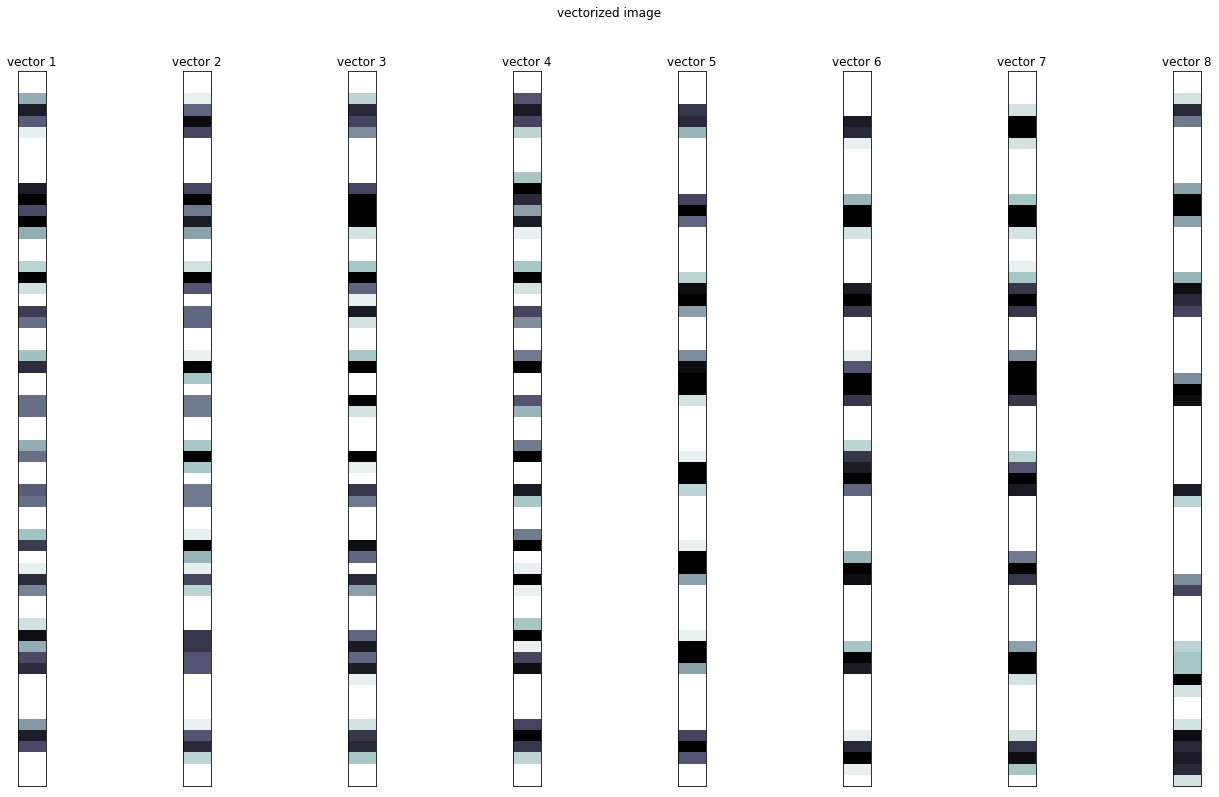

In [30]:
v = []
for i in range(8):
    v.append(d[i].reshape(64, 1))  # 벡터화
    
plt.figure(figsize=(8, 6))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(v[i], aspect=0.4,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.suptitle("vectorized image", y=1.05)
plt.tight_layout(w_pad=7)
plt.show()

#### 행렬

행렬은 복수의 차원을 가지는 데이터 레코드가 다시 여러 개 있는 경우의 데이터를 합쳐서 표기한 것이다. 예를 들어 앞서 말한 붓꽃 예에서 붓꽃 6 송이에 대해 꽃잎과 꽃받침의 크기를 측정하였다면 4차원 붓꽃 데이터가 6개가 있다. 즉, $4 \times 6 = 24$개의 실수 숫자가 있는 것이다. 이 숫자 집합을 행렬로 나타내면 다음과 같다. 행렬은 보통 $X$와 같이 알파벳 대문자로 표기한다.
 
$$
\begin{align}
X = 
\begin{bmatrix}
\boxed{\begin{matrix} x_{1, 1} & x_{1, 2} & x_{1, 3} & x_{1, 4}\end{matrix}}  \\
\begin{matrix} x_{2, 1} & x_{2, 2} & x_{2, 3} & x_{2, 4}\end{matrix} \\
\begin{matrix} x_{3, 1} & x_{3, 2} & x_{3, 3} & x_{3, 4}\end{matrix} \\
\begin{matrix} x_{4, 1} & x_{4, 2} & x_{4, 3} & x_{4, 4}\end{matrix} \\
\begin{matrix} x_{5, 1} & x_{5, 2} & x_{5, 3} & x_{5, 4}\end{matrix} \\
\begin{matrix} x_{6, 1} & x_{6, 2} & x_{6, 3} & x_{6, 4}\end{matrix} \\
\end{bmatrix}
\tag{2.1.9}
\end{align}
$$

행렬의 원소 하나하나는 $x_{2, 3}$처럼 두 개의 숫자 쌍을 아래첨자(subscript)로 붙여서 표기한다. 첫 번째 숫자가 행을 뜻하고 두 번째 숫자가 열을 뜻한다. 예를 들어 $x_{2, 3}$은 두 번째 행(위에서 아래로 두 번째), 세 번째 열(왼쪽에서 오른쪽으로 세 번째)의 숫자를 뜻한다. 행/열의 개수가 10보다 적을 때는 쉼표 없이 $x_{23}$이라고 표기할 때도 있다. 

벡터는 열의 수가 1인 행렬이라고 볼 수 있으므로 벡터를 다른 말로 **열 벡터(column vector)**라고도 한다.

데이터를 행렬로 묶어서 표시할 때는 붓꽃 하나에 대한 데이터 레코드, 즉 **하나의 벡터가 열이 아닌 행(row)으로 표시한다.**
붓꽃의 예에서는 하나의 데이터 레코드가 4차원 데이터였다는 점을 기억하자.

**하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열(column)**로 나타내고 **복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행(row)**으로 표기하는 것은 얼핏 보기에는 일관성이 없어 보지만 추후 다른 연산을 할 때 이런 모양이 필요하기 때문이다. 데이터 분석에서 쓰는 일반적인 관례이므로 외워두어야 한다.

만약 이 데이터를 이용하여 붓꽃의 종을 결정하는 예측 문제를 풀고 있다면 이 행을 **특징 행렬(feature matrix)**이라고 하기도 한다. 이 행렬의 크기를 수식으로 표시할 때는 다음처럼 "행의 크기 곱하기 열의 크기"로 나타낸다.

$$ 
\begin{align}
X \in \mathbf{R}^{6\times 4} 
\tag{2.1.10}
\end{align}
$$

**스칼라와 벡터도 수학적으로는 행렬에 속한다**. 스칼라는 열과 행의 수가 각각 1인 행렬이고 벡터는 열의 수가 1인 행렬이다. 그래서 스칼라나 벡터의 크기를 표시할 때 다음처럼 쓸 수도 있다.

스칼라는

$$ 
\begin{align}
a \in \mathbf{R}^{1\times 1} 
\tag{2.1.11}
\end{align}
$$

벡터는 (예를 들어 길이가 4인 붓꽃 벡터의 경우) 

$$ 
\begin{align}
x \in \mathbf{R}^{4\times 1} 
\tag{2.1.12}
\end{align}
$$

로 써도 행렬이 아닌 벡터라는 뜻이다.


앞에서 예로 들었던 두 송이의 붓꽃 데이터를 하나의 행렬로 합치면 다음과 같다.

$$ 
\begin{align}
X=
\begin{bmatrix}
5.1 & 3.5 & 1.4 & 0.2 \\
4.9 & 3.0 & 1.4 & 0.2 \\
\end{bmatrix}
\tag{2.1.13}
\end{align}
$$

NumPy를 이용하여 행렬을 표기할 때는 2차원 `ndarray` 객체를 사용한다. 예를 들어 다음 행렬 $A$를 NumPy로 나타내면 다음과 같다.

$$ 
\begin{align}
A=
\begin{bmatrix}
11 & 12 & 13 \\
21 & 22 & 23 \\
\end{bmatrix}
\tag{2.1.14}
\end{align}
$$

In [7]:
A = np.array([[11,12,13],[21,22,23]])
A

array([[11, 12, 13],
       [21, 22, 23]])

#### 연습 문제 2.1.2

넘파이를 사용해서 붓꽃 데이터 $X$에 대한 행렬 변수 ``X``를 만든다.

### 텐서

텐서는 같은 크기의 행렬이 여러 개 같이 묶여 있는 것을 말한다. 엄격한 수학적 정의로는 텐서는 다차원 배열로 표현되는 사상(mapping)으로 다차원 배열 자체를 뜻하지 않는다. 하지만 데이터 사이언스 분야에서는 흔히 다차원 배열을 텐서라고 부르므로 여기에서는 이러한 정의를 따르도록 한다.

예를 들어 다음 컬러 이미지는 2차원의 행렬처럼 보이지만 사실 빨강, 초록, 파랑의 밝기를 나타내는 3가지의 이미지가 겹친 것이다. 컬러 이미지에서는 각각의 색을 나타내는 행렬을 채널(channel)이라고 한다. 예제 이미지는 크기가 768 x 1024이고 3개의 채널이 있으므로 768 x 1024 x 3 크기의 3차원 텐서다.

In [31]:
from scipy import misc  # 패키지 임포트

img_rgb = misc.face()  # 컬러 이미지 로드
img_rgb.shape  # 데이터의 모양

(768, 1024, 3)

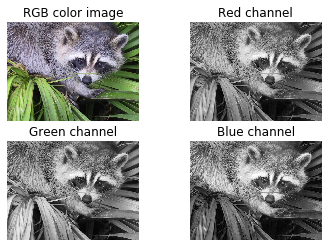

In [40]:
plt.subplot(221)
plt.imshow(img_rgb, cmap=plt.cm.gray)  # 컬러 이미지 출력
plt.axis("off")
plt.title("RGB color image")

plt.subplot(222)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.gray)  # red 채널 출력
plt.axis("off")
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.gray)  # green 채널 출력
plt.axis("off")
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.gray)  # blue 채널 출력
plt.axis("off")
plt.title("Blue channel")

plt.show()

### 전치 연산

이번에는 이러한 스칼라, 벡터, 행렬 데이터를 변형시키는 방법 즉, 연산(operation)에 대해서 알아보자. **전치(transpose)** 연산은 행렬에서 가장 기본이 되는 연산으로 행렬의 **행과 열을 바꾸는 연산**을 말한다. 전치 연산은 벡터나 행렬에 $T$라는 위첨자(superscript)를 붙여서 표기한다. 책에 따라서는 프라임(prime)기호 $'$를 붙이는 경우도 있다. 

$x$를 전치연산하면 

$$
\begin{align}
x \;\; \rightarrow \;\; x^T
\tag{2.1.15}
\end{align}
$$

또는

$$
\begin{align}
x \;\; \rightarrow \;\; x' 
\tag{2.1.16}
\end{align}
$$

앞에서 보인 $6\times 4$ 차원의 행렬을 전치 연산하면 $4\times 6$ 차원의 행렬이 된다.

$$
\begin{align}
X = 
\begin{bmatrix}
\boxed{\begin{matrix} x_{1, 1} & x_{1, 2} & x_{1, 3} & x_{1, 4}\end{matrix}}  \\
\begin{matrix} x_{2, 1} & x_{2, 2} & x_{2, 3} & x_{2, 4}\end{matrix} \\
\begin{matrix} x_{3, 1} & x_{3, 2} & x_{3, 3} & x_{3, 4}\end{matrix} \\
\begin{matrix} x_{4, 1} & x_{4, 2} & x_{4, 3} & x_{4, 4}\end{matrix} \\
\begin{matrix} x_{5, 1} & x_{5, 2} & x_{5, 3} & x_{5, 4}\end{matrix} \\
\begin{matrix} x_{6, 1} & x_{6, 2} & x_{6, 3} & x_{6, 4}\end{matrix} \\
\end{bmatrix}
\;\; \rightarrow \;\;
X^T = 
\begin{bmatrix}
\boxed{\begin{matrix} x_{1, 1} \\ x_{1, 2} \\ x_{1, 3} \\ x_{1, 4}\end{matrix}} &
\begin{matrix} x_{2, 1} \\ x_{2, 2} \\ x_{2, 3} \\ x_{2, 4}\end{matrix} &
\begin{matrix} x_{3, 1} \\ x_{3, 2} \\ x_{3, 3} \\ x_{3, 4}\end{matrix} &
\begin{matrix} x_{4, 1} \\ x_{4, 2} \\ x_{4, 3} \\ x_{4, 4}\end{matrix} &
\begin{matrix} x_{5, 1} \\ x_{5, 2} \\ x_{5, 3} \\ x_{5, 4}\end{matrix} &
\begin{matrix} x_{6, 1} \\ x_{6, 2} \\ x_{6, 3} \\ x_{6, 4}\end{matrix} &
\end{bmatrix}
\tag{2.1.17}
\end{align}
$$

전치 연산으로 만든 행렬을 원래 행렬에 대한 전치행렬이라고 한다. (열)벡터 $x$에 대해 전치 연산을 적용하여 만든 $x^T$는 행의 수가 1인 행렬이므로 **행 벡터(row vector)**라고 한다.

$$ 
\begin{align}
x = 
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix}
\; \rightarrow \;
x^T = 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N}
\end{bmatrix}
\tag{2.1.18}
\end{align}
$$

NumPy에서는 `ndarray` 객체의 `T`라는 속성을 이용하여 전치 행렬을 구한다. 이때 `T`는 메서드(method)가 아닌 속성(attribute)이므로 소괄호 ``()``를 붙여서 호출하면 안 된다.

In [10]:
A.T

array([[11, 21],
       [12, 22],
       [13, 23]])

다만 1차원 `ndarray`는 전치 연산이 정의되지 않는다.

In [11]:
x1

array([5.1, 3.5, 1.4, 0.2])

In [12]:
x1.T

array([5.1, 3.5, 1.4, 0.2])

#### 연습 문제 2.1.3

1. NumPy를 사용해서 붓꽃 데이터 $X$의 전치행렬 $X^T$을 구한다.
2. NumPy를 사용해서 위 전치행렬을 다시 전치한 행렬 $(X^T)^T$을 구한다. 이 행렬과 원래 행렬 $X$을 비교한다.

In [47]:
A = iris.data
print(A)
# print(A.T)
# print(A.T.T)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### 행렬의 행 표기법과 열 표기법

전치 연산과 행 벡터, 열 벡터를 이용하면 다음처럼 행렬을 복수의 열 벡터 $c_i$, 또는 복수의 행 벡터 $r_j^T$ 을 합친(concatenated) 형태로 표기할 수도 있다.

$$
\begin{align}
X 
=
\begin{bmatrix}
c_1 & c_2 & \cdots & c_M
\end{bmatrix}
=
\begin{bmatrix}
r_1^T  \\
r_2^T  \\ 
\vdots \\ 
r_N^T  \\  
\end{bmatrix}
\tag{2.1.19}
\end{align}
$$

위 식에서 행렬과 벡터의 크기는 다음과 같다.

$$ 
\begin{align}
X \in \mathbf{R}^{N\times M}
\tag{2.1.20}
\end{align}
$$

$$
\begin{align}
c_i \in \mathbf{R}^{N \times 1} \; (i=1,\cdots,M)
\tag{2.1.21}
\end{align}
$$

$$
\begin{align}
r_j^T \in \mathbf{R}^{1 \times M} \; (j=1,\cdots,N) 
\tag{2.1.22}
\end{align}
$$

벡터의 모양을 직사각형으로 표시하면 다음과 같다.

$$
\begin{align}
X = 
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_1 \\ \phantom{\LARGE\mathstrut} \end{matrix}} & 
\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_2 \\ \phantom{\LARGE\mathstrut} \end{matrix}} & 
\cdots &
\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_M \\ \phantom{\LARGE\mathstrut} \end{matrix}} 
\end{bmatrix}
=
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{} & \phantom{} & r_1^T & \phantom{} & \phantom{} \end{matrix}} \\ 
\boxed{\begin{matrix} \phantom{} & \phantom{} & r_2^T & \phantom{} & \phantom{} \end{matrix}} \\ 
\vdots \\ 
\boxed{\begin{matrix} \phantom{} & \phantom{} & r_N^T & \phantom{} & \phantom{} \end{matrix}} \\ 
\end{bmatrix}
\tag{2.1.23}
\end{align}
$$


위의 식은 다음과 같은 명제를 수식으로 표현한 것이다.

> "행렬 $X$의 각 열은 $c_1$, $c_2$, $\ldots$, $c_M$라고 이름 붙인다." 

또는

> "행렬 $X$는 열 벡터 $c_1$, $c_2$, $\ldots$, $c_M$으로 이루어져 있다."

행 관점에서는 

> "행렬 $X$의 각 행은 $r_1^T$, $r_2^T$, $\ldots$, $r_N^T$라고 이름 붙인다."

또는 

> "행렬 $X$는 행 벡터 $r_1^T$, $r_2^T$, $\ldots$, $r_N^T$으로 이루어져 있다."

모든 벡터는 기본적으로 열벡터이므로 $r_i$를 전치 연산하여 $r_i^T$라고 행을 표현한 점에 주의한다.

예를 들어 행렬

$$ 
\begin{align}
X=
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\tag{2.1.24}
\end{align}
$$

은 열 벡터 

$$ 
\begin{align}
c_1=
\begin{bmatrix}
1 \\
4 
\end{bmatrix},
\;
c_2=
\begin{bmatrix}
2 \\
5 
\end{bmatrix},
\;
c_3=
\begin{bmatrix}
3 \\
6 
\end{bmatrix}
\tag{2.1.25}
\end{align}
$$

이 합쳐진 것이라고 보거나 또는 행 벡터

$$ 
\begin{align}
r_1=
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}^T,
\;
r_2=
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}^T
\tag{2.1.26}
\end{align}
$$

로 구성되었다고 볼 수 있다.

### 특수한 벡터와 행렬

몇 가지 특수한 벡터와 행렬은 별도의 기호나 이름이 붙는다. 

#### 영벡터 

모든 원소가 0인 $N$차원 벡터는 **영벡터(zeros-vector)**라고 하며 다음처럼 표기한다.

$$ 
\begin{align}
\mathbf{0}_N = \mathbf{0} = 0 =
\begin{bmatrix}
0 \\
0 \\
\vdots \\
0 \\
\end{bmatrix}
\tag{2.1.27}
\end{align}
$$

$$ 
\begin{align}
0 \in \mathbf{R}^{N \times 1} 
\tag{2.1.28}
\end{align}
$$

문맥으로 벡터의 크기를 알 수 있을 때는 크기를 나타내는 아래 첨자 $N$을 생략할 수 있다.

NumPy에서 영벡터는 `zeros()` 명령으로 만든다.

In [13]:
np.zeros((3, 1))

array([[0.],
       [0.],
       [0.]])

#### 일벡터 

모든 원소가 1인 $N$차원 벡터는 **일벡터(ones-vector)**라고 하며 다음처럼 표기한다.

$$ 
\begin{align}
\mathbf{1}_N = \mathbf{1}  = 1 = 
\begin{bmatrix}
1 \\
1 \\
\vdots \\
1 \\
\end{bmatrix}
\tag{2.1.29}
\end{align}
$$

$$ 
\begin{align}
1 \in \mathbf{R}^{N \times 1} 
\tag{2.1.30}
\end{align}
$$

마찬가지로 문맥으로 벡터의 크기를 알 수 있을 때는 크기를 나타내는 아래 첨자 $N$을 생략할 수 있다.

NumPy에서 일벡터는 `ones()` 명령으로 만든다.

In [14]:
np.ones((3, 1))

array([[1.],
       [1.],
       [1.]])

#### 정방행렬 

행의 개수와 열의 개수가 같은 행렬을 **정방행렬(square matrix)**이라고 한다.

#### 대각행렬

행렬에서 행과 열이 같은 위치를 주 대각(main diagonal) 또는 간단히 **대각(diagonal)**이라고 한다. 대각 위치에 있지 않은 것들은 **비대각(off-diagonal)**이라고 한다. 모든 비대각 요소가 0인 행렬을 **대각행렬(diagonal matrix)**이라고 한다.

$$ 
\begin{align}
D = 
\begin{bmatrix}
d_{1} & 0 & \cdots & 0 \\
0 & d_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & d_{N} \\
\end{bmatrix}
\tag{2.1.31}
\end{align}
$$

$$ 
\begin{align}
D \in \mathbf{R}^{N \times N} 
\tag{2.1.32}
\end{align}
$$

대각행렬이 되려면 비대각성분이 0이기만 하면 되고 대각성분은 0이든 아니든 상관없다. 또한 반드시 정방행렬일 필요도 없다. 
예를 들어 다음 행렬도 대각행렬이라고 할 수 있다.

$$ 
\begin{align}
D = 
\begin{bmatrix}
d_{1} & 0 & \cdots & 0 \\
0 & d_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & d_{M} \\
0 & 0 & \cdots & 0 \\
0 & 0 & \cdots & 0 \\
0 & 0 & \cdots & 0 \\
\end{bmatrix}
\tag{2.1.33}
\end{align}
$$

$$
\begin{align}
D \in \mathbf{R}^{N \times M} 
\tag{2.1.34}
\end{align}
$$

NumPy로 대각 정방행렬을 생성하려면 `diag()` 명령을 사용한다.

In [15]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

#### 항등행렬



대각행렬 중에서도 모든 대각성분의 값이 1인 대각행렬을 **항등행렬(identity matrix)**이라고 한다. 항등행렬은 보통 알파벳 대문자 $I$로 표기한다.

$$ 
\begin{align}
I = 
\begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1 \\
\end{bmatrix}
\tag{2.1.35}
\end{align}
$$

$$ 
\begin{align}
I \in \mathbf{R}^{N \times N}
\tag{2.1.36}
\end{align}
$$

NumPy로 항등행렬을 생성하려면 `identity()` 혹은 `eye()` 명령을 사용한다.

In [16]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [17]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

#### 대칭행렬

만약 전치연산을 통해서 얻은 전치행렬과 원래의 행렬이 같으면 **대칭행렬(symmetric matrix)**이라고 한다. 정방행렬만 대칭행렬이 될 수 있다.

$$ 
\begin{align}
S^{T} = S 
\tag{2.1.37}
\end{align}
$$ 

$$ 
\begin{align}
S \in \mathbf{R}^{N \times N} 
\tag{2.1.38}
\end{align}
$$

#### 연습 문제 2.1.4

1. 영벡터, 일벡터, 정방행렬, 대각행렬, 항등행렬, 대칭행렬의 예를 하나씩 만들어본다.
2. 위의 벡터와 행렬을 NumPy로 나타내 본다.